1. Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng 
đầu tiên. 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_data(filename):
    return pd.read_csv(filename)
filename = "titanic_disaster.csv"
disaster =  load_data(filename)
disaster.head(10)

ModuleNotFoundError: No module named 'sklearn'

2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat 
map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked 

PassengerId    177
Survived       177
Pclass         177
Name           177
Sex            177
Age              0
SibSp          177
Parch          177
Ticket         177
Fare           177
Cabin           19
Embarked       177
dtype: int64
PassengerId    687
Survived       687
Pclass         687
Name           687
Sex            687
Age            529
SibSp          687
Parch          687
Ticket         687
Fare           687
Cabin            0
Embarked       687
dtype: int64
PassengerId    2
Survived       2
Pclass         2
Name           2
Sex            2
Age            2
SibSp          2
Parch          2
Ticket         2
Fare           2
Cabin          2
Embarked       0
dtype: int64


<Axes: >

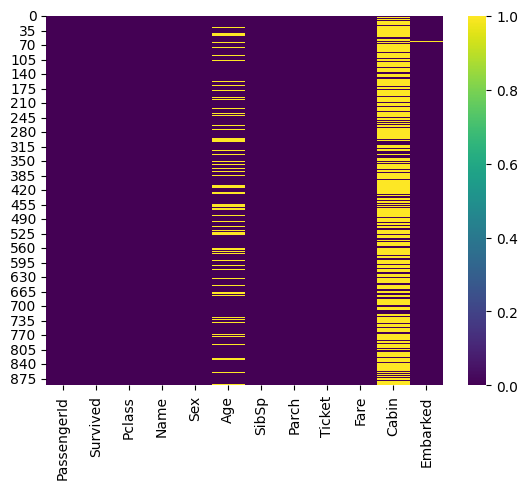

In [3]:
dfage = disaster[disaster['Age'].isna()]
print(dfage.count())

dfcabin = disaster[disaster['Cabin'].isna()]
print(dfcabin.count())

dfembarked = disaster[disaster['Embarked'].isna()]
print(dfembarked.count())

sns.heatmap(disaster.isna(), cmap='viridis')

3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi 
tách cột xong thì xóa luôn cột Name 

In [4]:
disaster[['firstName', 'secondName']]= disaster['Name'].str.split(',' , expand = True)
disaster_splitname = disaster.drop("Name", axis=1)
disaster_splitname.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male → M và female → F 

In [5]:
def substitute_Sex(x_df):
    mapping={'male':'M','female':'F'}
    x_df['Sex']=x_df['Sex'].map(mapping)
    return x_df
disaster = disaster_splitname.pipe(substitute_Sex)
disaster.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa 
ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng 
vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau 

a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân 
phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm 
hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu. 


<Axes: xlabel='Pclass', ylabel='Age'>

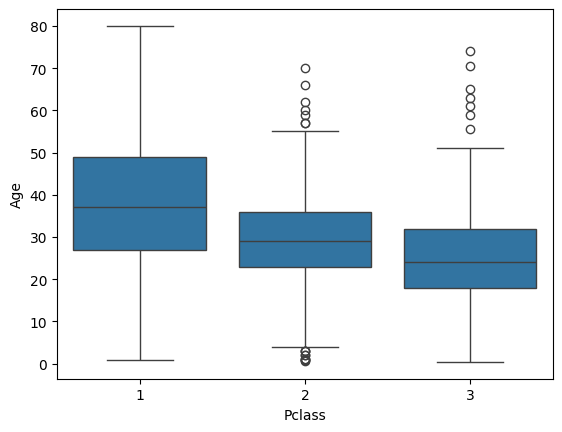

In [6]:
sns.boxplot(y='Age', x='Pclass', data=disaster)

b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực 
quan dữ liệu đã xử lý thiếu cho cột’Age’ bằng biểu đồ Heat map. 

In [7]:
disaster["Age"][disaster["Pclass"] == 1] = disaster["Age"][disaster["Pclass"] == 1].fillna(disaster["Age"][disaster["Pclass"] == 1].median(), inplace=False)
disaster["Age"][disaster["Pclass"] == 2] = disaster["Age"][disaster["Pclass"] == 2].fillna(disaster["Age"][disaster["Pclass"] == 2].median(), inplace=False)
disaster["Age"][disaster["Pclass"] == 3] = disaster["Age"][disaster["Pclass"] == 3].fillna(disaster["Age"][disaster["Pclass"] == 3].median(), inplace=False)

C:\Users\thine\AppData\Local\Temp\ipykernel_18644\2309247104.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  disaster["Age"][disaster["Pclass"] == 1] = disaster["Age"][disaster["Pclass"] == 1].fillna(disaster["Age"][disaster["Pclass"] ==

6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa 
trên độ tuổi của hành khách như sau: (age =< 12] → Kid; (12, 18]: Teen, (18, 60]: Adult 
và ( age > 60): Older 

In [8]:
disaster.loc[(disaster['Age']<=12),'Agegroup'] = 'Kid'
disaster.loc[(disaster['Age']>12) &(disaster['Age']<18), 'Agegroup'] = 'Teen'
disaster.loc[(disaster['Age']>=18)&(disaster['Age']<=60),'Agegroup'] = 'Adult'
disaster.loc[(disaster['Age']>60), 'Agegroup'] = 'Older'
disaster.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult


7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách  Mr, 
Mrs, Miss, Master ra khỏi “secondName”

In [9]:
listNamePrefix=[]
for index, row in disaster.iterrows():
    vitri = row['secondName'].strip().find(' ')
    secondname=row['secondName'].strip()
    namePrefix=secondname[vitri+1:]
    listNamePrefix.append(namePrefix)
cotNamePrefix=pd.DataFrame(listNamePrefix,columns=['namePrefix'])
disaster=pd.concat([disaster,cotNamePrefix],axis=1,sort=False)
print(disaster)

     PassengerId  Survived  Pclass Sex   Age  SibSp  Parch            Ticket  \
0              1         0       3   M  22.0      1      0         A/5 21171   
1              2         1       1   F  38.0      1      0          PC 17599   
2              3         1       3   F  26.0      0      0  STON/O2. 3101282   
3              4         1       1   F  35.0      1      0            113803   
4              5         0       3   M  35.0      0      0            373450   
..           ...       ...     ...  ..   ...    ...    ...               ...   
886          887         0       2   M  27.0      0      0            211536   
887          888         1       1   F  19.0      0      0            112053   
888          889         0       3   F  24.0      1      2        W./C. 6607   
889          890         1       1   M  26.0      0      0            111369   
890          891         0       3   M  32.0      0      0            370376   

        Fare Cabin Embarked  firstName 

8. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối 
với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch 

In [10]:

disaster['familySize'] = 1 + disaster['SibSp'] + disaster['Parch']
print(disaster[['SibSp', 'Parch', 'familySize']].head(10))


   SibSp  Parch  familySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1
5      0      0           1
6      0      0           1
7      3      1           5
8      0      2           3
9      1      0           2


9. Tạo thêm đặc trưng ‘Alone’ để xác định hành khách đi theo nhóm hay cá nhân bằng cách 
dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0. 

In [11]:
disaster['familySize'] = 1 + disaster['SibSp'] + disaster['Parch']

# Hàm xác định giá trị của cột "Alone"
def is_alone(family_size):
    if family_size == 0:
        return 1
    else:
        return 0
    
disaster['Alone'] = disaster['familySize'].apply(is_alone)

print(disaster[['familySize', 'Alone']].head(10))

   familySize  Alone
0           2      0
1           2      0
2           1      0
3           2      0
4           1      0
5           1      0
6           1      0
7           5      0
8           3      0
9           2      0


10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính 
cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu 
thì thay thế bằng “Unknown” 

In [12]:
disaster['typeCabin'] = disaster['Cabin'].fillna('Unknown')
typeCabin = disaster['typeCabin']
for i in range(len(typeCabin)):
  temp = str(typeCabin[i])
  if temp != 'Unknown':
    typeCabin[i] = temp[:1]

C:\Users\thine\AppData\Local\Temp\ipykernel_18644\747028390.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  typeCabin[i] = temp[:1]
C:\Users\thine\AppData\Local\Temp\ipykernel_18644\747028390.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  typeCabin[i] = temp[:1]
C:\Users\thine\AppData\Local\Temp\ipykernel_18644\747028390.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  typeCabin[i] = temp[:1]
C:\Users\thine\AppData\Local\Te

In [13]:
disaster.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix,familySize,Alone,typeCabin
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Owen Harris,2,0,Unknown
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,John Bradley (Florence Briggs Thayer),2,0,C
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Laina,1,0,Unknown
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Jacques Heath (Lily May Peel),2,0,C
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,William Henry,1,0,Unknown


11. Loại bỏ dữ liệu thừa đối với các hành khách xuất hiện trong cả 2 tập dữ liệu huấn luyện  
(train.csv) và đánh giá (test.csv). Ưu tiên giữ lại dữ liệu trong tập huấn luyện.

In [14]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Tìm các dòng dữ liệu trùng lặp trong tập dữ liệu đánh giá
duplicate_rows = test_data[test_data.duplicated()]

# Loại bỏ các dòng dữ liệu trùng lặp trong tập dữ liệu đánh giá
test_data = test_data.drop_duplicates()

# Hiển thị số lượng dòng dữ liệu đã loại bỏ
print("Số lượng dòng dữ liệu đã loại bỏ trong tập dữ liệu đánh giá:", len(duplicate_rows))

# Tiếp tục xử lý dữ liệu và thực hiện các phần còn lại của công việc của bạn..."""


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa4 in position 14: invalid start byte